In [3]:
import pandas as pd

In [59]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression 

In [65]:
from sklearn.metrics import mean_squared_error

In [6]:
df_jan22 = pd.read_parquet('data/yellow_tripdata_2022-01.parquet')

In [5]:
!pip install pyarrow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 40.9 MB/s eta 0:00:0000:0100:01


In [9]:
df_jan22.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [33]:
df_jan22['tpep_dropoff_datetime'] = pd.to_datetime(df_jan22['tpep_dropoff_datetime'])
df_jan22['tpep_pickup_datetime'] = pd.to_datetime(df_jan22['tpep_pickup_datetime'])
df_jan22['duration'] = (df_jan22['tpep_dropoff_datetime'] - df_jan22['tpep_pickup_datetime'])

In [34]:
df_jan22['duration'] = df_jan22['duration'].apply(lambda td : td.total_seconds()/60)

In [36]:
df_jan22['duration'].describe()

count    2.463931e+06
mean     1.421220e+01
std      4.644531e+01
min     -3.442400e+03
25%      6.316667e+00
50%      1.018333e+01
75%      1.616667e+01
max      8.513183e+03
Name: duration, dtype: float64

In [45]:
df_jan22_1_60_duration = df_jan22[(df_jan22['duration']>=1)&(df_jan22['duration']<=60)]

In [46]:
df_jan22_1_60_duration.shape[0]/df_jan22.shape[0]

0.9827547930522406

In [47]:
categorical = ['PULocationID','DOLocationID']
numerical = ['trip_distance']

In [51]:
df_jan22_1_60_duration[categorical] = df_jan22_1_60_duration[categorical].astype(str)

/tmp/ipykernel_1419/2547167476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jan22_1_60_duration[categorical] = df_jan22_1_60_duration[categorical].astype(str)


In [53]:
df_jan22_1_60_duration[categorical+numerical].iloc[:10,:].to_dict(orient='records')

[{'PULocationID': '142', 'DOLocationID': '236', 'trip_distance': 3.8},
 {'PULocationID': '236', 'DOLocationID': '42', 'trip_distance': 2.1},
 {'PULocationID': '166', 'DOLocationID': '166', 'trip_distance': 0.97},
 {'PULocationID': '114', 'DOLocationID': '68', 'trip_distance': 1.09},
 {'PULocationID': '68', 'DOLocationID': '163', 'trip_distance': 4.3},
 {'PULocationID': '138', 'DOLocationID': '161', 'trip_distance': 10.3},
 {'PULocationID': '233', 'DOLocationID': '87', 'trip_distance': 5.07},
 {'PULocationID': '238', 'DOLocationID': '152', 'trip_distance': 2.02},
 {'PULocationID': '166', 'DOLocationID': '236', 'trip_distance': 2.71},
 {'PULocationID': '236', 'DOLocationID': '141', 'trip_distance': 0.78}]

In [64]:
train_dicts = df_jan22_1_60_duration[categorical].to_dict(orient='records')

In [66]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [67]:
X_train.shape

(2421440, 515)

In [68]:
target = 'duration'
y_train = df_jan22_1_60_duration[target].values

In [69]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [70]:
y_pred = lr.predict(X_train)

/tmp/ipykernel_1419/951012812.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label='prediction')
/tmp/ipykernel_1419/951012812.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train,label='actual')


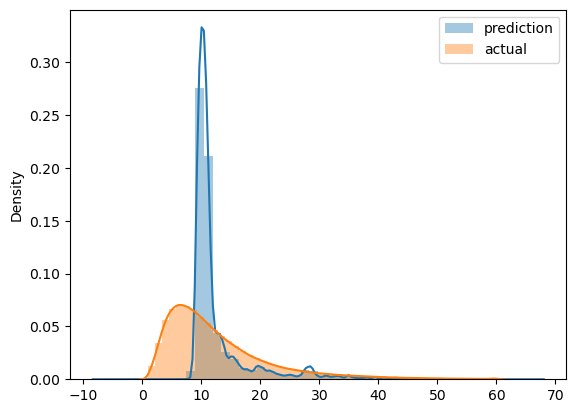

In [71]:
sns.distplot(y_pred,label='prediction')
sns.distplot(y_train,label='actual')
plt.legend()

In [72]:
mean_squared_error(y_train,y_pred,squared=False)

6.986190933347471

In [76]:
df_feb22 = pd.read_parquet('data/yellow_tripdata_2022-02.parquet')

In [78]:
df_feb22['tpep_dropoff_datetime'] = pd.to_datetime(df_feb22['tpep_dropoff_datetime'])
df_feb22['tpep_pickup_datetime'] = pd.to_datetime(df_feb22['tpep_pickup_datetime'])
df_feb22['duration'] = (df_feb22['tpep_dropoff_datetime'] - df_feb22['tpep_pickup_datetime'])
df_feb22['duration'] = df_feb22['duration'].apply(lambda td : td.total_seconds()/60)
df_feb22_1_60_duration = df_feb22[(df_feb22['duration']>=1)&(df_feb22['duration']<=60)]

In [79]:
val_dicts = df_feb22_1_60_duration[categorical].astype(str).to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_val = df_feb22_1_60_duration[target]

In [80]:
y_pred = lr.predict(X_val)
mean_squared_error(y_val,y_pred,squared=False)

7.786411367752442